In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Ler a Imagem

In [2]:
img = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)
img

array([[ 73,  73,  70, ...,  39,  39,  45],
       [ 80,  73,  80, ...,  45,  39,  56],
       [ 73,  80,  73, ...,  45,  44,  45],
       ...,
       [228, 235, 235, ..., 102, 107, 115],
       [228, 228, 228, ..., 102, 107, 107],
       [224, 224, 228, ...,  99, 102, 107]], dtype=uint8)

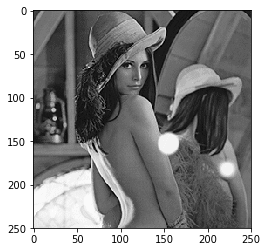

In [3]:
plt.imshow(img, 'gray')
plt.show()

# Fazer o padding. Filtro Média tamanho 3x3

In [4]:
lin, col = img.shape
print(lin)
print(col)

250
250


Criar kernel

In [103]:
def gaussianKernel(h1, h2):

    import numpy as np
    import matplotlib.pyplot as plt
    import math as m

    ## Returns a normalized 2D gauss kernel array for convolutions

    x, y = np.mgrid[0:h2, 0:h1]
    x = x-h2/2
    y = y-h1/2
    sigma = 1.5
    g = np.exp( -( x**2 + y**2 ) / (2*sigma**2) )
    return g / g.sum()

In [119]:
n = 5
kernel = np.ones((n, n))
kernel = kernel/kernel.sum()
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

In [120]:
kernel = gaussianKernel(5,5)
kernel

array([[0.00552604, 0.01344169, 0.02096397, 0.02096397, 0.01344169],
       [0.01344169, 0.0326959 , 0.0509933 , 0.0509933 , 0.0326959 ],
       [0.02096397, 0.0509933 , 0.07953034, 0.07953034, 0.0509933 ],
       [0.02096397, 0.0509933 , 0.07953034, 0.07953034, 0.0509933 ],
       [0.01344169, 0.0326959 , 0.0509933 , 0.0509933 , 0.0326959 ]])

Fazer o padding

In [121]:
padding_size = int(np.floor(n/2))

lin_novo = int(lin + 2 * np.floor(n/2))
col_novo = int(col + 2 * np.floor(n/2))
print(lin_novo)
print(col_novo)

254
254


In [122]:
img_buffer = np.zeros((lin_novo, col_novo))
img_buffer

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [123]:
img_buffer[padding_size:lin_novo-padding_size, padding_size:col_novo-padding_size] = img

In [124]:
img_buffer

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,  73., ...,  45.,   0.,   0.],
       ...,
       [  0.,   0., 224., ..., 107.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

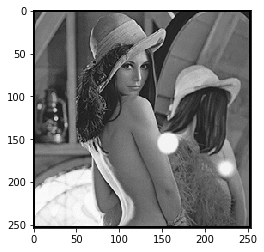

In [125]:
plt.imshow(img_buffer, 'gray')

Fazer a convolução

In [126]:
kernel

array([[0.00552604, 0.01344169, 0.02096397, 0.02096397, 0.01344169],
       [0.01344169, 0.0326959 , 0.0509933 , 0.0509933 , 0.0326959 ],
       [0.02096397, 0.0509933 , 0.07953034, 0.07953034, 0.0509933 ],
       [0.02096397, 0.0509933 , 0.07953034, 0.07953034, 0.0509933 ],
       [0.01344169, 0.0326959 , 0.0509933 , 0.0509933 , 0.0326959 ]])

In [127]:
img_buffer

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,  73., ...,  45.,   0.,   0.],
       ...,
       [  0.,   0., 224., ..., 107.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [128]:
img_buffer.shape[0]

254

In [129]:
# Fazere cópia da imagem buffer
img_copia = img_buffer.copy()
# lin
for i in range(padding_size, img_buffer.shape[0] - padding_size):
    # col
    for j in range(padding_size, img_buffer.shape[1] - padding_size):
        
        roi = img_buffer[i-padding_size:i+padding_size+1, j-padding_size:j+padding_size+1]
        
        r = (roi * kernel).mean()
        
        img_copia[i, j] = r    

In [130]:
padding_size

2

In [131]:
img_buffer.shape[1] - padding_size

252

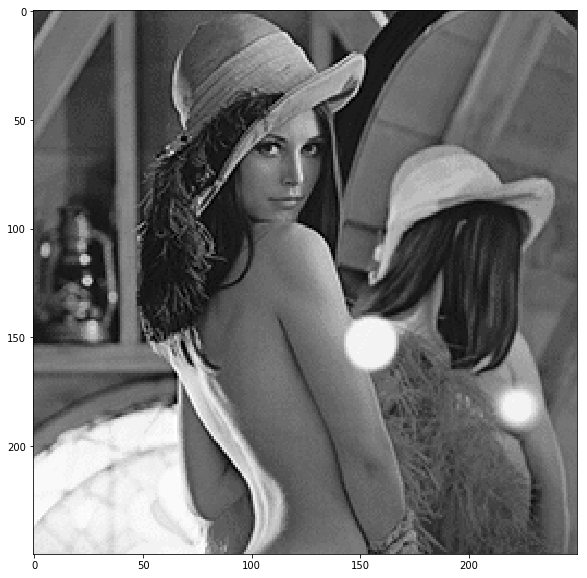

In [132]:
plt.figure(figsize=(10,10))
plt.imshow(img, 'gray')

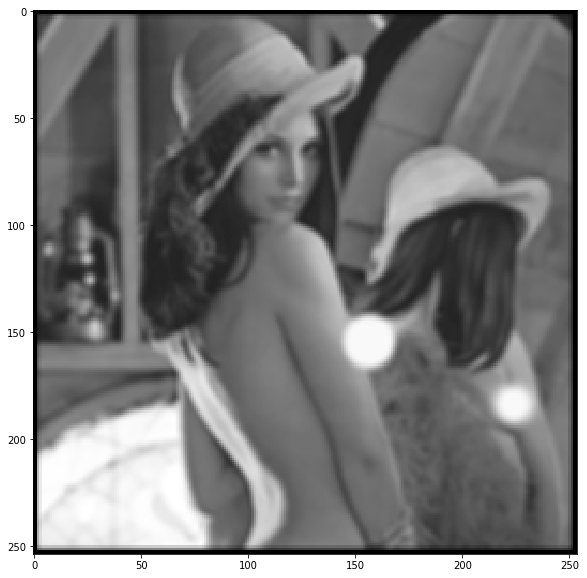

In [133]:
plt.figure(figsize=(10,10))
plt.imshow(img_copia, 'gray')

In [66]:
img_buffer.shape

(252, 252)